# 18. Geospatial data analysis of the Pandemic

- Geopandas
- Pandas dataframe

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import pandas as pd
#import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## 1. Bubble plot of Cases in a world map

In [2]:
fn = '../Datasets/geo.csv' # file name of the geospatial locations

geo = pd.read_csv(fn) # load data into a pandas datafram
geo.head()

,country/region\tlatitude\tlongitude\tname
0,AD\t42.546245\t1.601554\tAndorra
1,AE\t23.424076\t53.847818\tUnited Arab Emirates
2,AF\t33.93911\t67.709953\tAfghanistan
3,AG\t17.060816\t-61.796428\tAntigua and Barbuda
4,AI\t18.220554\t-63.068615\tAnguilla


It didn't give any error but the data frame looked weird, two problems: 
* '\t' seems mis identified in the data, so we should use the "sep" option
* index column is missing

So here's what we should do:

In [3]:
fn = '../Datasets/geo.csv' # file name of the geospatial locations
geo = pd.read_csv(fn,sep='\t')
geo.head()

,country/region,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [3]:
fn = '../Datasets/total-and-daily-cases-covid-19.csv' # file name
df = pd.read_csv(fn) # load file into data frame
df.head() # show the first 10 rows

# first change the column names slightly
df.rename(columns={'Total confirmed cases (cases)':'TotalCases',\
                   'Daily new confirmed cases (cases)':'DailyCases'},\
                    inplace=True)

df_c = df[df.Date=='Apr 1, 2020']
df_c.head()

,Entity,Code,Date,TotalCases,DailyCases
82,Afghanistan,AFG,"Apr 1, 2020",166,25
106,Albania,ALB,"Apr 1, 2020",243,20
194,Algeria,DZA,"Apr 1, 2020",584,73
213,Andorra,AND,"Apr 1, 2020",376,6
224,Angola,AGO,"Apr 1, 2020",7,0


In [5]:
# now let's convert the date strings to datetime object by adding a new column 'DT' 
df['DT']=pd.to_datetime(df.Date)
df.head()

,Entity,Code,Date,TotalCases,DailyCases,DT
0,Afghanistan,AFG,"Dec 31, 2019",0,0,2019-12-31
1,Afghanistan,AFG,"Jan 1, 2020",0,0,2020-01-01
2,Afghanistan,AFG,"Jan 2, 2020",0,0,2020-01-02
3,Afghanistan,AFG,"Jan 3, 2020",0,0,2020-01-03
4,Afghanistan,AFG,"Jan 4, 2020",0,0,2020-01-04


In [6]:
# merge
geo.rename(columns={'name':'Entity'},inplace=True)
dmerge = df_c.merge(geo, on="Entity", how = 'inner')

dmerge.head()

,Entity,Code,Date,TotalCases,DailyCases,country/region,latitude,longitude
0,Afghanistan,AFG,"Apr 1, 2020",166,25,AF,33.939110,67.709953
1,Albania,ALB,"Apr 1, 2020",243,20,AL,41.153332,20.168331
2,Algeria,DZA,"Apr 1, 2020",584,73,DZ,28.033886,1.659626
3,Andorra,AND,"Apr 1, 2020",376,6,AD,42.546245,1.601554
4,Angola,AGO,"Apr 1, 2020",7,0,AO,-11.202692,17.873887


Now we can use the combined data frame to create a world map of the cases. Since we have a quick idea about what the data frame looks like. Lets first make a map showing the numbers of total cases, using the basemap module.
* recall the mercator project for a world map:

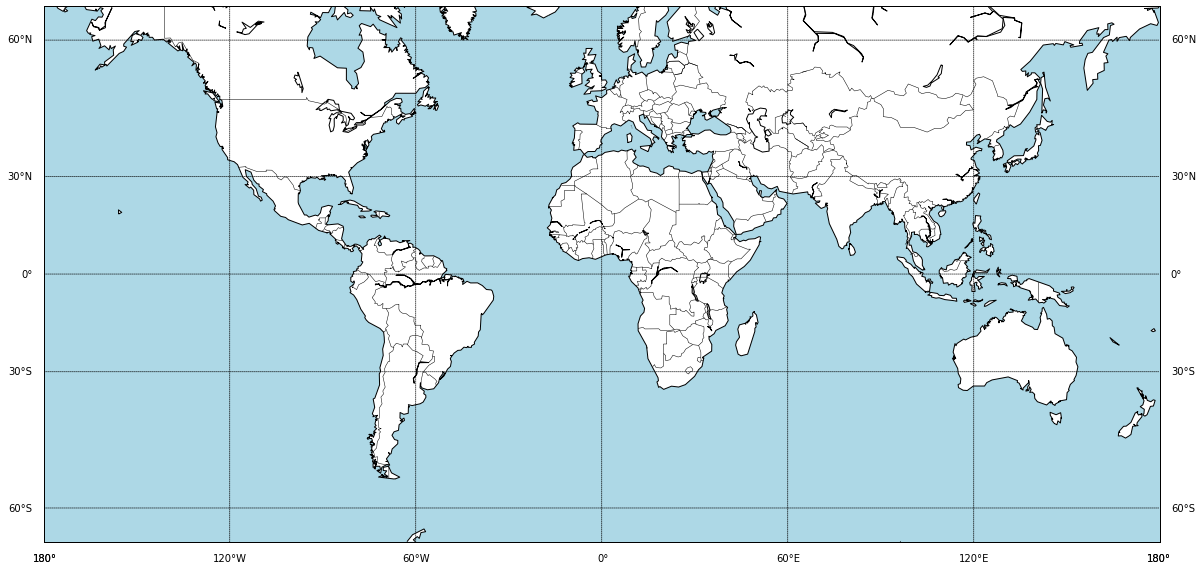

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap # import the basemap module using this syntax!

plt.figure(figsize=(20,15)) # create a new figure with size (16,15)

# make a map instance called 'm', pay attention to the boundaries of the map
m = Basemap(projection='merc',llcrnrlat=-65,urcrnrlat=65,llcrnrlon=-180,urcrnrlon=180) 
m.drawcoastlines(); # put on the coastlines

m.drawparallels(np.arange(-90.,91.,30.), labels=[True,True,False,False]) # plot the latitudes (parallels) from -90 to +90 in 30 degree intervals
m.drawmeridians(np.arange(-180.,181.,60.),labels=[False,False,False,True]); # same for longitudes (meridians) but with 60 degree intervals

m.fillcontinents(color='white')
m.drawmapboundary(fill_color='lightblue');
m.drawcountries(color='black',linewidth=0.5)
plt.show()

In [8]:
dmerge['country/region']=dmerge['Entity']
dmerge.set_index('country/region',inplace=True)
dmerge.head()
#dfinal[dfinal.Entity=='China'].TotalCases

,Entity,Code,Date,TotalCases,DailyCases,latitude,longitude
country/region,,,,,,,
Afghanistan,Afghanistan,AFG,"Apr 1, 2020",166,25,33.939110,67.709953
Albania,Albania,ALB,"Apr 1, 2020",243,20,41.153332,20.168331
Algeria,Algeria,DZA,"Apr 1, 2020",584,73,28.033886,1.659626
Andorra,Andorra,AND,"Apr 1, 2020",376,6,42.546245,1.601554
Angola,Angola,AGO,"Apr 1, 2020",7,0,-11.202692,17.873887


In [9]:
C = 'Afghanistan' # string variable for country
lat = dmerge['latitude'].loc[C]  # access the latitude, longitude
lon = dmerge['longitude'].loc[C] 
print(lat,lon)

33.93911 67.709953


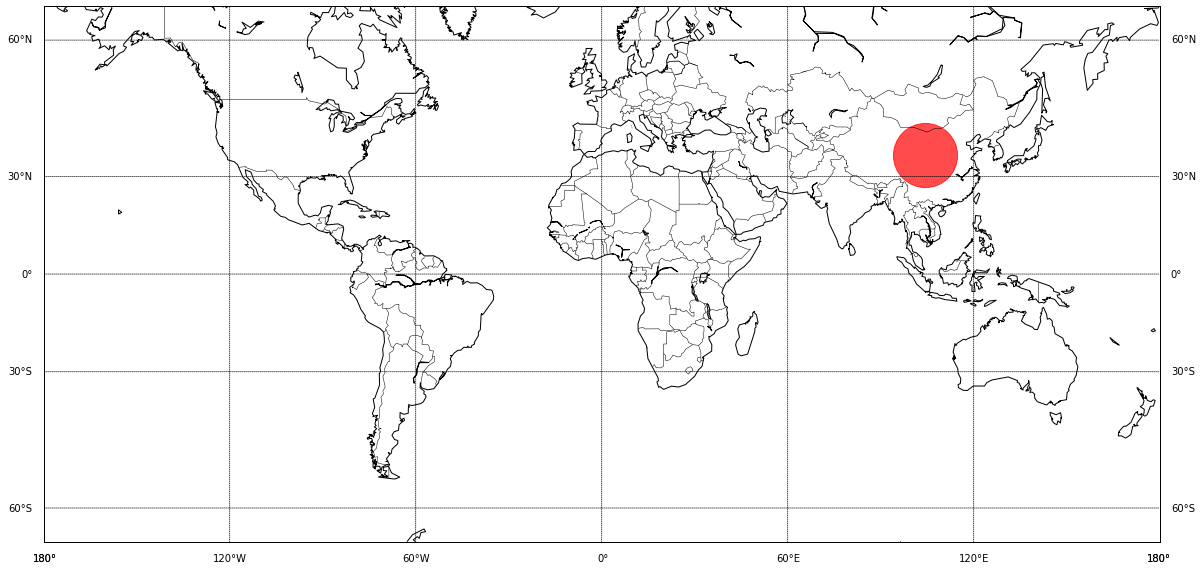

In [10]:
plt.figure(figsize=(20,15)) # create a new figure with size (16,15)

# make a map instance called 'm', pay attention to the boundaries of the map
m = Basemap(projection='merc',llcrnrlat=-65,urcrnrlat=65,llcrnrlon=-180,urcrnrlon=180) 
m.drawcoastlines(); # put on the coastlines

m.drawparallels(np.arange(-90.,91.,30.), labels=[True,True,False,False]) # plot the latitudes (parallels) 
m.drawmeridians(np.arange(-180.,181.,60.),labels=[False,False,False,True]); # same for longitudes (meridians) 

m.fillcontinents(color='none')
m.drawmapboundary(fill_color='none');
m.drawcountries(color='black',linewidth=0.5)

C = 'China' # string variable for country
lat = dmerge['latitude'].loc[C]  # access the latitude, longitude
lon = dmerge['longitude'].loc[C] 
x,y = m(lon,lat) # map the location of China into the map coordinate m()

# now let's get the total number of cases on 2020-3-30
Case = dmerge['TotalCases'].loc[C] # total case of China on Mar 30, 2020

plt.scatter(x,y,Case/20,c='r',alpha=0.7)
plt.show()

Now we can show all the countries in the same map using a similar bubble plot:

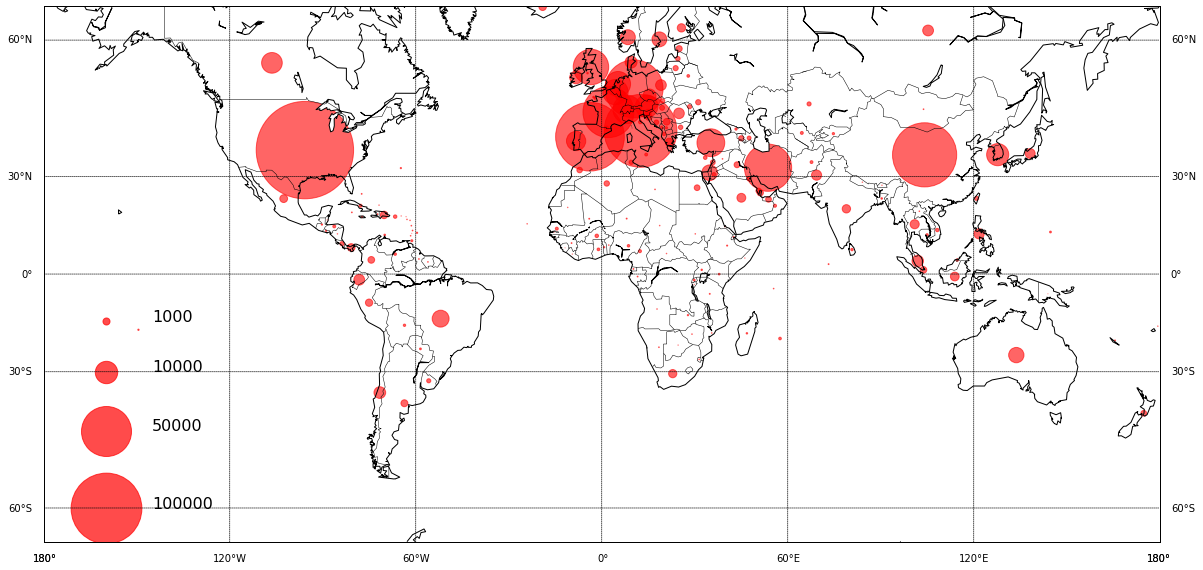

In [11]:
plt.figure(figsize=(20,15)) # create a new figure with size (16,15)

# make a map instance called 'm', pay attention to the boundaries of the map
m = Basemap(projection='merc',llcrnrlat=-65,urcrnrlat=65,llcrnrlon=-180,urcrnrlon=180) 
m.drawcoastlines(); # put on the coastlines

m.drawparallels(np.arange(-90.,91.,30.), labels=[True,True,False,False]) # plot the latitudes (parallels) 
m.drawmeridians(np.arange(-180.,181.,60.),labels=[False,False,False,True]); # same for longitudes (meridians) 

m.fillcontinents(color='none')
m.drawmapboundary(fill_color='none');
m.drawcountries(color='black',linewidth=0.5)

lat = np.array(dmerge['latitude'])  # access the latitude, longitude
lon = np.array(dmerge['longitude'])
x,y = m(lon,lat) # map the location of China into the map coordinate m()

# now let's get the total number of cases on 2020-3-30
Case = np.array(dmerge['TotalCases']) # total case of China on Mar 30, 2020

plt.scatter(x,y,Case/20,c='r',alpha=0.6)

#x,y=m(-160,-60)
#c=100000
#plt.scatter(x,y,s=c/20,c='r',alpha = 0.7)
# now put on legend manually - can you do it automatically?
D = 'Mar 30, 2020'
lat=[-15,-30,-45,-60]
cas=[1000,10000,50000,100000]
for l,c in zip(lat,cas):
    x,y=m(-160,l)
    plt.scatter(x,y,s=c/20,c='r',alpha = 0.7)
    x,y=m(-145,l)
    plt.text(x,y,c,fontsize=16)  
    

#plt.title('Total Confirmed cases of Covid-19 on '+ D, fontsize=24)
plt.show()

## 2. Color plot of countries with number of cases

### What is the GeoPandas Module?

**GeoPandas** is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by **shapely**. Geopandas further depends on **fiona** for file access and **descartes** and **matplotlib** for plotting.

The goal of GeoPandas is to make working with geospatial data in python easier. It combines the capabilities of **pandas** and **shapely**, providing geospatial operations in pandas and a high-level interface to multiple geometries to shapely. GeoPandas enables you to easily do operations in python that would otherwise require a spatial database such as PostGIS.

Here's the full documentation of geopandas: http://geopandas.org

In short, "GeoPandas is a perfect marriage between shapefiles and dataframes".


### 2. How to install the GeoPandas Module?

Recall the way you've installed the "Basemap" module in you Anaconda. Try the same thing with GeoPandas. To import the GeoPandas Module, simply use:

**import geopandas as gpd**

In [1]:
import geopandas as gpd

#read country GeoDataFrame
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Examine country GeoDataFrame
# Note The special column "geometry"
world.head()

world = world[(world.pop_est>0) & (world.name!="Antarctica")]

# Calculate GDP per capita for each country
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est*1e6
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",9092.903105
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",2791.425209
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",1502.686269
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",46991.214832
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",56823.436824


### the GeoDataFrame 

- GeoPandas makes reading spatial data very easy, and saves it as GeoDataFrames.  
- Shapefile is a commonly avaiable spatial data format, native to proprietary ArcGIS software by esri.  
- ArcGIS has Point-and-Click interface. It can be called in Python by the ArcPy package.   
- Alternatives, QGIS, R, Python, SAS etc.
- Common vector shapes: point, line, and polygon. 

The first thing to do is to plot the shapes of countries using the **plot()** function:

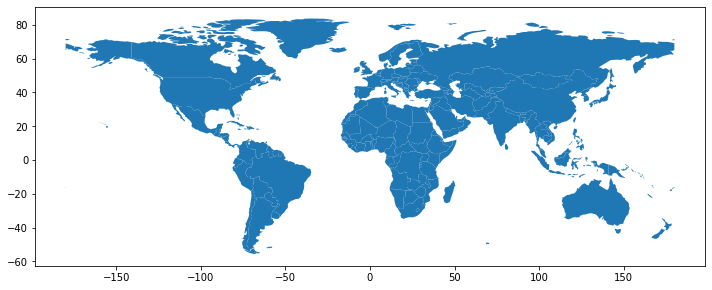

In [4]:
world.plot(figsize=(12,8))
plt.show()

###  Choropleth Maps

Maps where the color of each shape is based on the value of an associated variable.

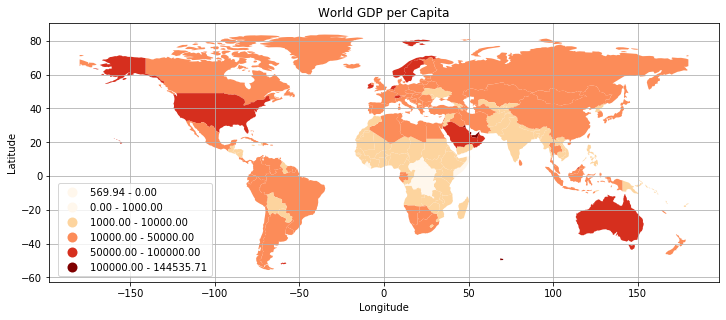

In [5]:
ax = world.plot(figsize=(12,6),column='gdp_per_cap',cmap='OrRd',scheme='userdefined',\
                classification_kwds=dict(bins=[0,1000,10000,50000,100000]),legend=True)
leg = ax.get_legend() # add a legend
leg.set_bbox_to_anchor((0., 0., 0.25, 0.4)) # specify the location of the legend (left corner)
ax.set_title('World GDP per Capita')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.grid(True) # add longitude-latitude grids
plt.show()

Add a color bar to the data:

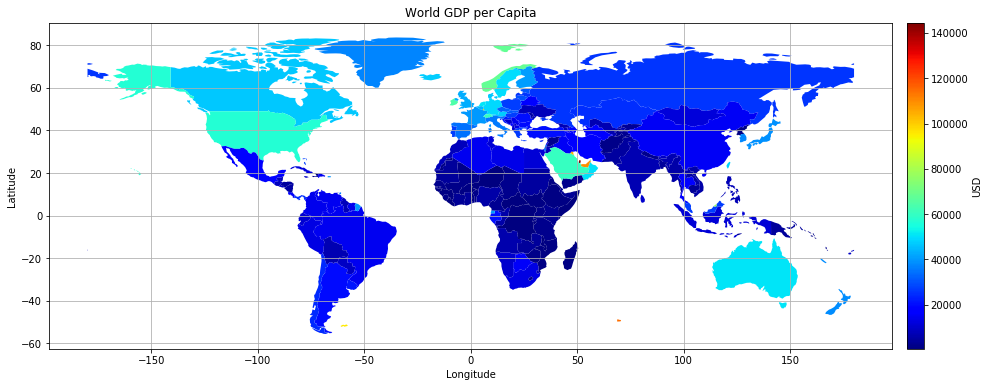

In [11]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize
from matplotlib import cm

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) # load the geodata frame
world = world[(world.pop_est>0) & (world.name!="Antarctica")] # exclude Antartica

world['gdp_per_cap'] = world.gdp_md_est / world.pop_est*1e6

# a map for gdp per capita with a colorbar
# column argument specifies the variable the color is based on
ax = world.plot(figsize=(18,6),column='gdp_per_cap',cmap='jet',legend=False)
ax.set_title('World GDP per Capita')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.grid(True)

norm = Normalize(vmin = world['gdp_per_cap'].min(),vmax = world['gdp_per_cap'].max())
n_cmap = cm.ScalarMappable(norm = norm, cmap = 'jet')
n_cmap.set_array([])

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.2)
bar = ax.get_figure().colorbar(n_cmap,ax=ax,cax=cax)
bar.set_label('USD');

### Aggregation countries to continents, Dissolve

We can also dissolve the GeoDataFrame by continents, in this example:

In [6]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
continents = world.dissolve(by='continent',aggfunc='sum')
continents.head()

,geometry,pop_est,gdp_md_est
continent,,,
Africa,"MULTIPOLYGON (((32.830 -26.742, 32.580 -27.470...",1219176238,6025295.50
Antarctica,"MULTIPOLYGON (((-163.713 -78.596, -163.713 -78...",4050,810.00
Asia,"MULTIPOLYGON (((120.295 -10.259, 118.968 -9.55...",4389144868,55434607.77
Europe,"MULTIPOLYGON (((-51.658 4.156, -52.249 3.241, ...",746398461,25284877.00
North America,"MULTIPOLYGON (((-61.680 10.760, -61.105 10.890...",573042112,23505137.00


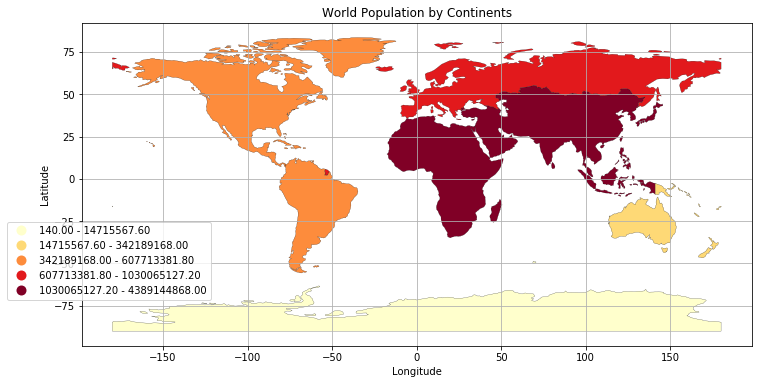

In [7]:
ax = continents.plot(figsize=(12,6),edgecolor='k',linewidth=0.2,column = 'pop_est', scheme='quantiles', 
                     cmap='YlOrRd', legend=True)
leg = ax.get_legend()
leg.set_bbox_to_anchor((0., 0., 0.2, 0.4))
ax.set_title('World Population by Continents')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.grid(True)

now let's merge the Covid-19 data frame with the geodataframe world, so that we can color the map with total number of cases:

### Merge two dataframes based on a primary key


In [8]:
df_c.head()

,Entity,Code,Date,TotalCases,DailyCases
82,Afghanistan,AFG,"Apr 1, 2020",166,25
106,Albania,ALB,"Apr 1, 2020",243,20
194,Algeria,DZA,"Apr 1, 2020",584,73
213,Andorra,AND,"Apr 1, 2020",376,6
224,Angola,AGO,"Apr 1, 2020",7,0


In [9]:
# merge the df_c dataframe into the world data frame
world.rename(columns={'iso_a3':'Code'},inplace=True)
covid = world.merge(df_c, on="Code", how = 'inner')

covid.head()

,pop_est,continent,name,Code,gdp_md_est,geometry,Entity,Date,TotalCases,DailyCases
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,"Apr 1, 2020",5,0
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,"Apr 1, 2020",19,0
2,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,"Apr 1, 2020",8536,1112
3,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,"Apr 1, 2020",189618,24998
4,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,"Apr 1, 2020",340,15


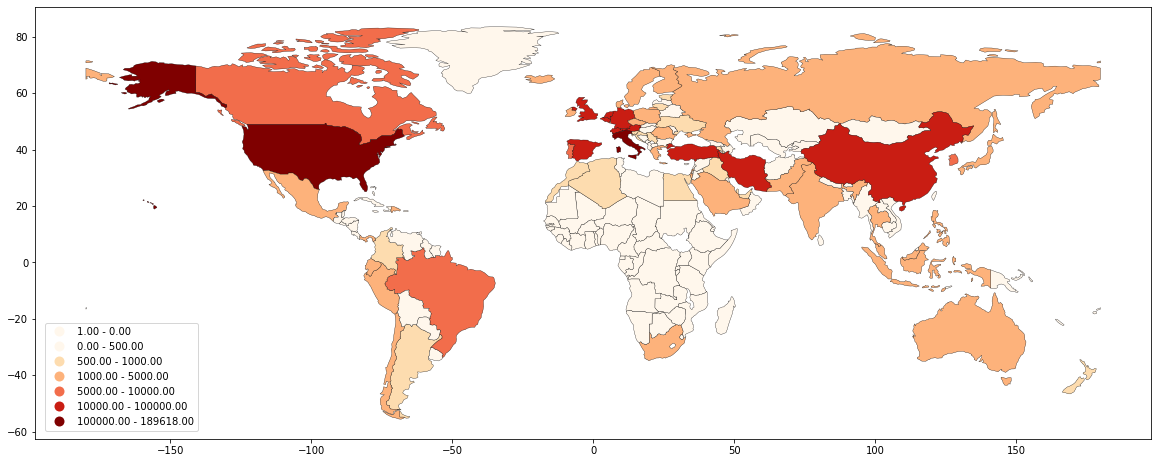

In [10]:
# map the TotalCases into a word map, using an orange-red colormap
ax = covid.plot(figsize=(20,16),column='TotalCases',edgecolor='k',linewidth = 0.3, cmap='OrRd',scheme='userdefined',\
                classification_kwds=dict(bins=[0,500,1000,5000,10000,100000]),legend=True)

leg = ax.get_legend() # add a legend
leg.set_bbox_to_anchor((0., 0., 0.15, 0.28)) # specify the location of the legend (left corner)

## References to Geo-statistics
ArcGIS/esri has pretty good documentation on various GIS techniques. 
- hot spot analysis
  http://pro.arcgis.com/en/pro-app/tool-reference/spatial-statistics/h-how-hot-spot-analysis-getis-ord-gi-spatial-stati.htm
- kriging
  This is the interpolation modeling I mentioned. https://en.wikipedia.org/wiki/Kriging
  http://desktop.arcgis.com/en/arcmap/10.3/tools/3d-analyst-toolbox/how-kriging-works.htm

## Other Resources
- Census Geo data and population data
  https://www.census.gov/geo/maps-data/data/tiger-line.html
- GeoPandas documentation
  http://geopandas.org/